<a href="https://colab.research.google.com/github/cnyakundi/fake_news_monitoring/blob/master/news_category_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NEWS CLASSIFICATION USING NEURAL NETWORKS

## Description

This is the preprocessing and building of a model that predicts the category of a news article using the headline.

The categories are :
1. Business
2. Politics
3. Sports

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import losses
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


[nltk_data] Downloading package punkt to /Users/RyanMburu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/RyanMburu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/RyanMburu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Load in the data

df = pd.read_csv('/Users/RyanMburu/Documents/DS-Projects/ProDev/Datasets/bbc_news_data.csv', sep = '\t')
df.head()

,Unnamed: 0,category,filename,title,content
0,0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


## Light Cleaning

In [ ]:
# Dropping columns
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df = df.drop(['filename'], axis=1)

In [ ]:
df.head()

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
# Check null values
df.isna().sum()

category    0
title       0
content     0
dtype: int64

In [ ]:
# Drop the entertainment and tech categories

df = df[(df.category != 'entertainment') & (df.category != 'tech')]

In [ ]:
df['category'].unique()

array(['business', 'politics', 'sport'], dtype=object)

## Light EDA

/Users/RyanMburu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


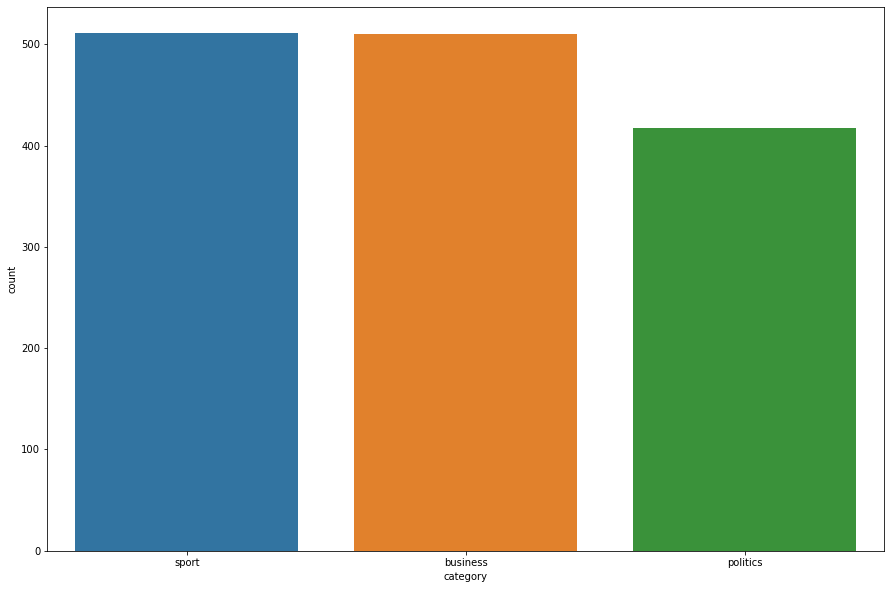

In [ ]:
# Most popular category

plt.figure(figsize=(15, 10))

sns.countplot(df['category'], order = df['category'].value_counts().index)
plt.show()

sport and business are the most popular categories

## Preprocessing

In [ ]:
df.head()

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
# Removing punctuations such as (, ), $, %, @ etc

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Function that iterates throung the words, removing punctuation
def punctuation_remover(text):
    no_puncts = " ".join([word for word in text.split() if word not in string.punctuation])
    return no_puncts

In [ ]:
df['title'] = df['title'].apply(lambda text : punctuation_remover(text))
df['title'].head(10)

0    Ad sales boost Time Warner profit
1     Dollar gains on Greenspan speech
2    Yukos unit buyer faces loan claim
3    High fuel prices hit BA's profits
4    Pernod takeover talk lifts Domecq
5     Japan narrowly escapes recession
6     Jobs growth still slow in the US
7     India calls for fair trade rules
8    Ethiopia's crop production up 24%
9    Court rejects $280bn tobacco case
Name: title, dtype: object

can still see some punctuations, which will be handled by the nltk module word_tokenize

In [ ]:
# Removing stopwords

stop_words = stopwords.words('english')

# will remove stopwords in both columns

def stopwords_remover(text):
    return " ".join([word for word in text.split() if word.lower() not in stop_words])



In [ ]:

df['title'] = df['title'].apply(lambda text : stopwords_remover(text))

df['title'].head(10)

0    Ad sales boost Time Warner profit
1        Dollar gains Greenspan speech
2    Yukos unit buyer faces loan claim
3    High fuel prices hit BA's profits
4    Pernod takeover talk lifts Domecq
5     Japan narrowly escapes recession
6            Jobs growth still slow US
7         India calls fair trade rules
8       Ethiopia's crop production 24%
9    Court rejects $280bn tobacco case
Name: title, dtype: object

In [ ]:
# Tokenizing - separate sentences to an array with distinct words
# Tokenizing the words

import nltk
tokenizerr = nltk.word_tokenize

df['title'] = df['title'].apply(tokenizerr)
df['title'].head(10)

0      [Ad, sales, boost, Time, Warner, profit]
1            [Dollar, gains, Greenspan, speech]
2      [Yukos, unit, buyer, faces, loan, claim]
3    [High, fuel, prices, hit, BA, 's, profits]
4       [Pernod, takeover, talk, lifts, Domecq]
5         [Japan, narrowly, escapes, recession]
6               [Jobs, growth, still, slow, US]
7            [India, calls, fair, trade, rules]
8       [Ethiopia, 's, crop, production, 24, %]
9     [Court, rejects, $, 280bn, tobacco, case]
Name: title, dtype: object

In [ ]:
# can call the punctuation function again

def punctuation_remover_2(text):
    no_puncts = [word for word in text if word not in string.punctuation]
    return no_puncts

df['title'] = df['title'].apply(lambda text : punctuation_remover_2(text))
df['title'].head(10)

0      [Ad, sales, boost, Time, Warner, profit]
1            [Dollar, gains, Greenspan, speech]
2      [Yukos, unit, buyer, faces, loan, claim]
3    [High, fuel, prices, hit, BA, 's, profits]
4       [Pernod, takeover, talk, lifts, Domecq]
5         [Japan, narrowly, escapes, recession]
6               [Jobs, growth, still, slow, US]
7            [India, calls, fair, trade, rules]
8          [Ethiopia, 's, crop, production, 24]
9        [Court, rejects, 280bn, tobacco, case]
Name: title, dtype: object

In [ ]:
# Stemming

# This is where words are diminished to their root form

stemmer = PorterStemmer()

def text_stemmer(text):
    stemmed = [stemmer.stem(word) for word in text]
    return stemmed

In [ ]:
# Apply on the title
df['title'] = df['title'].apply(lambda text: text_stemmer(text))
df['title'].head(10)


0     [ad, sale, boost, time, warner, profit]
1           [dollar, gain, greenspan, speech]
2      [yuko, unit, buyer, face, loan, claim]
3    [high, fuel, price, hit, ba, 's, profit]
4        [pernod, takeov, talk, lift, domecq]
5            [japan, narrowli, escap, recess]
6              [job, growth, still, slow, us]
7            [india, call, fair, trade, rule]
8           [ethiopia, 's, crop, product, 24]
9       [court, reject, 280bn, tobacco, case]
Name: title, dtype: object

In [ ]:
def text_lemma(text):
    stemmed2 = [lemma.lemmatize(word) for word in text]
    return stemmed2

In [ ]:
# Lemmatization

# opposite of stemming, where it is enforced to ensure the words havent lost meaning

lemma = WordNetLemmatizer()

df['title'] = df['title'].apply(lambda x: [text_lemma(y) for y in x])
df['title'].head(30)

0      [ad, sale, boost, time, warner, profit]
1            [dollar, gain, greenspan, speech]
2       [yuko, unit, buyer, face, loan, claim]
3     [high, fuel, price, hit, ba, 's, profit]
4         [pernod, takeov, talk, lift, domecq]
5             [japan, narrowli, escap, recess]
6                [job, growth, still, slow, u]
7             [india, call, fair, trade, rule]
8            [ethiopia, 's, crop, product, 24]
9        [court, reject, 280bn, tobacco, case]
10          [ask, jeev, tip, onlin, ad, reviv]
11       [indonesian, face, fuel, price, rise]
12          [peugeot, deal, boost, mitsubishi]
13          [telegraph, newspap, axe, 90, job]
14         [air, passeng, win, new, eu, right]
15          [china, keep, tight, rein, credit]
16            [parmalat, boast, doubl, profit]
17     [india, 's, rupe, hit, five-year, high]
18             [india, widen, access, telecom]
19         [call, centr, user, 'lose, patienc]
20              [rank, 'set, sell, film, unit]
21       [slu

In [ ]:
# Join the words

df['title'] = df['title'].apply(lambda x: ' '.join(x))
df.head(10)

,category,title,content
0,business,ad sale boost time warner profit,Quarterly profits at US media giant TimeWarne...
1,business,dollar gain greenspan speech,The dollar has hit its highest level against ...
2,business,yuko unit buyer face loan claim,The owners of embattled Russian oil giant Yuk...
3,business,high fuel price hit ba 's profit,British Airways has blamed high fuel prices f...
4,business,pernod takeov talk lift domecq,Shares in UK drinks and food firm Allied Dome...
5,business,japan narrowli escap recess,Japan's economy teetered on the brink of a te...
6,business,job growth still slow u,The US created fewer jobs than expected in Ja...
7,business,india call fair trade rule,"India, which attends the G7 meeting of seven ..."
8,business,ethiopia 's crop product 24,Ethiopia produced 14.27 million tonnes of cro...
9,business,court reject 280bn tobacco case,A US government claim accusing the country's ...


In [ ]:
# hot encode the category

# Get dummies

df = pd.get_dummies(df, columns=['category'])
df



,title,content,category_business,category_politics,category_sport
0,ad sale boost time warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0
1,dollar gain greenspan speech,The dollar has hit its highest level against ...,1,0,0
2,yuko unit buyer face loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0
3,high fuel price hit ba 's profit,British Airways has blamed high fuel prices f...,1,0,0
4,pernod takeov talk lift domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0
...,...,...,...,...,...
1819,big gun ea san jose,Top-seeded Americans Andy Roddick and Andre A...,0,0,1
1820,almagro continu spanish surg,Unseeded Nicolas Almagro became the fifth Spa...,0,0,1
1821,melzer shock agassi san jose,Second seed Andre Agassi suffered a comprehen...,0,0,1
1822,mirza make indian tenni histori,Teenager Sania Mirza completed a superb week ...,0,0,1


In [ ]:
# Split into X and y

X = df['title']
y = df.drop(['title', 'content'], axis = 1)

In [ ]:
y

,category_business,category_politics,category_sport
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1819,0,0,1
1820,0,0,1
1821,0,0,1
1822,0,0,1


In [ ]:
# Tokenize the data in X

tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(X)

sequence = tokenizer.texts_to_sequences(X)

In [ ]:
# Pickling the tokenizer model

import pickle

pickle_out = open('tokenizer_model_2.pickle', 'wb')

pickle.dump(tokenizer, pickle_out)

pickle_out.close()

In [ ]:
# Padding - require to be same length

padded_text = pad_sequences(sequence, maxlen=15)

padded_text

array([[   0,    0,    0, ...,  255, 1039,   20],
       [   0,    0,    0, ...,  256, 1040, 1041],
       [   0,    0,    0, ...,   11,  632,   39],
       ...,
       [   0,    0,    0, ...,  434,  627,  628],
       [   0,    0,    0, ...,  228,  438,  615],
       [   0,    0,    0, ...,   11, 1038,  188]], dtype=int32)

In [ ]:
len(padded_text)

1438

In [ ]:
# Split into train and test data

X_train, X_test, y_train, y_test = train_test_split(padded_text, y, test_size=0.1, random_state=0)

In [ ]:
y_test

,category_business,category_politics,category_sport
34,1,0,0
1447,0,0,1
1641,0,0,1
333,1,0,0
141,1,0,0
...,...,...,...
1346,0,0,1
1622,0,0,1
1756,0,0,1
108,1,0,0


# Modelling using TensorFlow

In [ ]:
class_model = tf.keras.Sequential([
    layers.Embedding(3000, 50, input_length=15),
    layers.LSTM(64),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation = 'sigmoid')
])

class_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 50)            150000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 771       
Total params: 196,851
Trainable params: 196,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=["CategoricalAccuracy"])

In [ ]:
# Fitting the model

history = class_model.fit(X_train, y_train, batch_size=80, epochs=10, validation_split=0.1)

Epoch 1/10
15/15 [==============================] - 6s 93ms/step - loss: 1.0929 - categorical_accuracy: 0.3763 - val_loss: 1.1006 - val_categorical_accuracy: 0.4538
Epoch 2/10
15/15 [==============================] - 1s 46ms/step - loss: 1.0605 - categorical_accuracy: 0.4321 - val_loss: 1.0522 - val_categorical_accuracy: 0.5538
Epoch 3/10
15/15 [==============================] - 1s 38ms/step - loss: 0.8777 - categorical_accuracy: 0.7131 - val_loss: 0.7864 - val_categorical_accuracy: 0.7154
Epoch 4/10
15/15 [==============================] - 1s 38ms/step - loss: 0.3722 - categorical_accuracy: 0.9201 - val_loss: 0.6154 - val_categorical_accuracy: 0.7538
Epoch 5/10
15/15 [==============================] - 1s 39ms/step - loss: 0.0962 - categorical_accuracy: 0.9751 - val_loss: 0.3414 - val_categorical_accuracy: 0.8846
Epoch 6/10
15/15 [==============================] - 1s 37ms/step - loss: 0.0285 - categorical_accuracy: 0.9931 - val_loss: 0.3654 - val_categorical_accuracy: 0.8615
Epoch 7/10

In [ ]:
accuracy1 = class_model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.4382 - categorical_accuracy: 0.8819


The model has an 85% accuracy

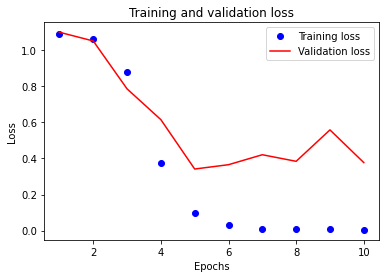

In [ ]:
# Finding the optimal number of epochs

# Training loss vs epochs
history_dict = history.history
history_dict.keys()

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




As seen, the validation loss line started deferring after the 5th epoch, resulting to overfitting. Therefore the optimal number of epochs is 5

In [ ]:
# Model with 5 epochs
class_model.fit(X_train, y_train, batch_size=80, epochs=5, validation_split=0.1)

Epoch 1/5
15/15 [==============================] - 6s 94ms/step - loss: 1.0946 - categorical_accuracy: 0.4021 - val_loss: 1.0992 - val_categorical_accuracy: 0.5154
Epoch 2/5
15/15 [==============================] - 1s 46ms/step - loss: 1.0683 - categorical_accuracy: 0.5464 - val_loss: 1.0678 - val_categorical_accuracy: 0.5308
Epoch 3/5
15/15 [==============================] - 1s 38ms/step - loss: 0.9225 - categorical_accuracy: 0.7302 - val_loss: 0.8740 - val_categorical_accuracy: 0.5846
Epoch 4/5
15/15 [==============================] - 1s 38ms/step - loss: 0.4636 - categorical_accuracy: 0.8849 - val_loss: 0.4416 - val_categorical_accuracy: 0.8308
Epoch 5/5
15/15 [==============================] - 1s 40ms/step - loss: 0.0954 - categorical_accuracy: 0.9768 - val_loss: 0.3725 - val_categorical_accuracy: 0.8615


In [ ]:
# Performing predictions

y_pred = class_model.predict(X_test)
y_pred

array([[0.99902415, 0.04206139, 0.00494951],
       [0.2933437 , 0.7528224 , 0.578202  ],
       [0.09063071, 0.5314744 , 0.96318495],
       [0.9965825 , 0.05927938, 0.01746845],
       [0.9998697 , 0.0075314 , 0.00300372],
       [0.9911375 , 0.26449347, 0.00749779],
       [0.25419298, 0.9008527 , 0.33380863],
       [0.97235936, 0.16674924, 0.07715696],
       [0.25460237, 0.9738848 , 0.07273498],
       [0.5082042 , 0.11978072, 0.9363414 ],
       [0.14536512, 0.9815544 , 0.12935841],
       [0.09582227, 0.98569393, 0.15432855],
       [0.9952626 , 0.18931183, 0.00546291],
       [0.24728584, 0.9746165 , 0.06686041],
       [0.13366836, 0.68428785, 0.8813279 ],
       [0.98994833, 0.1052117 , 0.03629783],
       [0.09779432, 0.86006606, 0.77345705],
       [0.24904317, 0.40404332, 0.9103419 ],
       [0.10521567, 0.22133258, 0.9908556 ],
       [0.84862465, 0.2914728 , 0.2918421 ],
       [0.8595424 , 0.86730385, 0.01078072],
       [0.6043929 , 0.8947899 , 0.06290615],
       [0.

The output is arrays with probabilities of the outputs

In [ ]:
y_pred_cat = np.argmax(y_pred, axis =1 )
y_pred_cat

array([0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 1,
       1, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 1,
       0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1])

0 - Business
1 - politics
2 - sport

In [ ]:
y_test

,category_business,category_politics,category_sport
34,1,0,0
1447,0,0,1
1641,0,0,1
333,1,0,0
141,1,0,0
...,...,...,...
1346,0,0,1
1622,0,0,1
1756,0,0,1
108,1,0,0


In [ ]:
# List of values with the correct values of y

y_test = y_test.idxmax(axis=1).values
conditions = [
    y_test == 'category_business',
    y_test == 'category_politics',
    y_test == 'category_sport'
]
values = [0, 1, 2]

y_test = np.select(conditions, values)
y_test

array([0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0,
       1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 1,
       1, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 1, 0,
       2, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2,
       2, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
matrix = confusion_matrix(y_test, y_pred_cat)
matrix

array([[36, 12,  4],
       [ 1, 30,  1],
       [ 3,  4, 53]])

In [ ]:
print('the model has an accuracy of : ', accuracy_score(y_test, y_pred_cat))

the model has an accuracy of :  0.8263888888888888


In [ ]:
print(classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        52
           1       0.65      0.94      0.77        32
           2       0.91      0.88      0.90        60

    accuracy                           0.83       144
   macro avg       0.82      0.84      0.82       144
weighted avg       0.85      0.83      0.83       144



82% Accuracy!!

# Draft Deployment

In [ ]:
# Will create a user function that does the preprocessing, passes the tokens through a model and displays output

def news_classifier():
    text = input('Whats the news headline?')

    #stopwords
    text = stopwords_remover(text)

    # Tokenize the text
    text = tokenizerr(text)

    # Remove punctuation
    text = punctuation_remover_2(text)

    # Stemming
    text = text_stemmer(text)

    # Lemmatizing
    text = text_lemma(text)

    # Combining the words
    # text = " ".join(text)

    # Tokenizing
    tokens = tokenizer.texts_to_sequences([text])
    
    # Padding
    stemmed_tokens = pad_sequences(tokens, maxlen=15)

    # Pass through the neural network model
    class_prob = class_model.predict(stemmed_tokens)

    final_class = np.argmax(class_prob)

    if final_class == 0:
        print('The news article is a Business article')
    elif final_class == 1:
        print('The news article is under Politics')
    else:
        print('The news article is under Sports')
    

    return final_class



In [ ]:
news_classifier()

The news article is under Sports


2

In [ ]:
# Exporting the NN model

# pickle_out = open('category_model.pickle', 'wb')

# pickle.dump(class_model, pickle_out)

# pickle_out.close()


In [ ]:
# Saving the model
# from tensorflow.keras.models import Sequential


class_model.save('class_model2.h5')

In [ ]:
# Load the model
from tensorflow import keras

imported_class_model = keras.models.load_model('/Users/RyanMburu/Documents/DS-Projects/ProDev/class_model2.h5')
imported_class_model